# 选择**数据集Titanic-data**作为本项目分析对象。


### 探索性分析    
**首先，对各因素与生还情况的关系进行探索性分析**
这些因素包括：年龄、性别、舱级、舱位等已有的数据资料。

### 特征工程
**对各因素间的相互影响进行分析，并建立新的特征**

### 建模
**建模对生还情况进行预测分析**
<br>

## 导入库 

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
from collections import Counter

%matplotlib inline
sns.set_style("white",{'axes.spines.right':False,'axes.spines.top':False,\
               'font.family': ['sans-serif'],'font.sans-serif': ['Microsoft Yahei']})

## 导入数据  
同时导入训练集和测试集，便于统一清洗和整理。

In [2]:
titanic_train = pd.read_csv('titanic-data.csv')
titanic_train.insert(len(titanic_train.columns),'tn_ts',1)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tn_ts
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [3]:
titanic_test = pd.read_csv('test.csv')
titanic_test.insert(len(titanic_test.columns),'tn_ts',2)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tn_ts
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [4]:
titanic_df = pd.concat([titanic_train,titanic_test],axis=0,sort=False)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tn_ts
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,tn_ts
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,1.319328
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,2.000000


统计该数据集中所有人数，以及生还的人数。  
从如上分析结果可知，**该数据集中共统计乘客人数1309人，其中生还数据有891条，因为测试集无此数据，有生还信息的数据中生还率为0.38**    
<br>
## 清洗数据

In [6]:
titanic_clean = titanic_df.copy()
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
tn_ts          1309 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [7]:
print(pd.isnull(titanic_clean).sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
tn_ts             0
dtype: int64


In [9]:
def missing_rate(df):
    return pd.isnull(df).sum()/pd.isnull(df).count()

missing_rate(titanic_df)

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
tn_ts          0.000000
dtype: float64

#### 因列Cabin的值缺失率太高，暂以空值作为其中一种类型'U'。

In [10]:
titanic_clean['Cabin'].fillna('Unknown',inplace=True)
titanic_clean['Cabin_attr'] = titanic_clean['Cabin'].apply(lambda x:x[0])
titanic_clean['Cabin_attr'].value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_attr, dtype: int64

In [11]:
titanic_clean.loc[(titanic_clean.Cabin != 'Unknown') & (titanic_clean['Cabin_attr'] == 'U'),'PassengerId'].count()

0

避免因之前填空的‘Unknown'造成与原有的Cabin首字母存在冲突。

#### Embarked列有两个空值，数量较少，查看一下详情。 

In [12]:
titanic_clean.loc[titanic_clean.Embarked.isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tn_ts,Cabin_attr
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,B
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,B


缺失该数据的为一等舱的女性，且Ticket号码、Cabin和Fare均一致，推测为同一批登船者。

In [13]:
titanic_clean.pivot_table('Fare',['Pclass','Embarked','Cabin_attr'])

Fare
Pclass Embarked Cabin_attr            
1      C        A            35.209473
                B           167.461069
                C           106.259044
                D            75.736725
                E            99.071591
                U            88.697910
       Q        C            90.000000
       S        A            47.279155
                B            78.585352
                C           110.369588
                D            47.707292
                E            46.435326
                T            35.500000
                U            55.325114
2      C        D            13.893750
                U            24.868400
       Q        E            12.350000
                U            11.632633
       S        D            13.000000
                E            11.333333
                F            23.423077
                U            21.283817
3      C        F            12.272233
                U            10.983340
       Q        F             7.750000
                U            10.414399
       S        E            11.000000
                F             7.650000
                G            14.205000
                U            14.515505

从上可看出，客舱号在B开头的是在C或者S登船，从票价上来看，与S登船的平均票价比较相符，Emabrked以S来填空。

In [14]:
titanic_clean.loc[titanic_clean.Embarked.isnull(),'Embarked'] = 'S'

** Fare列有一个空值。**

In [15]:
titanic_clean.loc[titanic_clean.Fare.isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tn_ts,Cabin_attr
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,2,U


In [16]:
titanic_clean.loc[(titanic_clean.Pclass == 3) & (titanic_clean.Embarked == 'S'),:].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,tn_ts
count,495.000000,353.000000,495.0,399.000000,495.000000,495.000000,494.000000,495.000000
mean,628.549495,0.189802,3.0,25.247068,0.660606,0.472727,14.435422,1.286869
std,375.948292,0.392701,0.0,11.826986,1.461366,1.097828,13.118281,0.452757
min,1.000000,0.000000,3.0,0.170000,0.000000,0.000000,0.000000,1.000000
25%,294.500000,0.000000,3.0,19.000000,0.000000,0.000000,7.854200,1.000000
50%,629.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000,1.000000
75%,944.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.900000,2.000000
max,1308.000000,1.000000,3.0,74.000000,8.000000,9.000000,69.550000,2.000000


In [17]:
titanic_clean.loc[(titanic_clean.Pclass == 3) & (titanic_clean.Embarked == 'S'),:].Fare.mode()

0    8.05
dtype: float64

在S登船的三等舱，中位数票价与众数值相同，选择以中位数填空。

In [18]:
titanic_clean.loc[titanic_clean.Fare.isnull(),'Fare'] = 8.05

#### Age空值率相对较高。  
从是否生还、名字信息及位于何等舱等不同情况下分析Age是否存在差异。

In [19]:
titanic_noAge = titanic_clean.loc[titanic_clean.Age.isnull(),:]
titanic_noAge.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,tn_ts
count,263.000000,177.000000,263.000000,0.0,263.000000,263.000000,263.000000,263.000000
mean,653.558935,0.293785,2.642586,NaN,0.482890,0.243346,19.823319,1.326996
std,380.161812,0.456787,0.726812,NaN,1.448443,0.949941,27.550667,0.470010
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,1.000000
25%,335.500000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000,1.000000
50%,630.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000,1.000000
75%,999.500000,1.000000,3.000000,NaN,0.000000,0.000000,22.804150,2.000000
max,1309.000000,1.000000,3.000000,NaN,8.000000,9.000000,227.525000,2.000000


缺失年龄数据的部分，生还率0.29低于整体的0.38；   
Pclass平均值为2.6要大于整体的2.3，且25%值已经是3；  
Fare在平均值、四分位及最大值方面均低于整体，但标准差会更小，说明数据更为集中在中下水平。

In [20]:
titanic_clean.pivot_table('Age',['Pclass'])

,Age
Pclass,
1,39.159930
2,29.506705
3,24.816367


不同等级的船舱，平均年龄存在一定的差异，一等舱>二等舱>三等舱

In [21]:
titanic_clean.Name.sample(10)

396                           Olsson, Miss. Elina
309    Hansen, Mrs. Claus Peter (Jennie L Howard)
817                            Mallet, Mr. Albert
192             van Billiard, Master. Walter John
234                     Cumings, Mr. John Bradley
37                       Cann, Mr. Ernest Charles
299                           Johansson, Mr. Nils
18                   Ilmakangas, Miss. Ida Livija
235                        Vendel, Mr. Olof Edvin
452               Foreman, Mr. Benjamin Laventall
Name: Name, dtype: object

对Name列中的称呼抬头进行提取，有诸如性别、头衔等信息。

In [22]:
titanic_clean['title'] = titanic_clean['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
pd.crosstab(titanic_clean.title,titanic_clean.Sex)

Sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


只有title为Dr时出现同时存在男性和女性的情况,且人数较少，查看一下具体情况。

In [23]:
titanic_clean.loc[(titanic_clean.title == 'Dr'),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tn_ts,Cabin_attr,title
245,246,0.0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,1,C,Dr
317,318,0.0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,Unknown,S,1,U,Dr
398,399,0.0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,Unknown,S,1,U,Dr
632,633,1.0,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,1,B,Dr
660,661,1.0,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,Unknown,S,1,U,Dr
766,767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,Unknown,C,1,U,Dr
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,D,Dr
293,1185,NaN,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,2,A,Dr


仅有一位男性的年龄缺失，对于Dr职位的人来说，在年龄方面会稍长一些，从上面的数据可知多数在50岁左右，少数较为年轻，对该年龄空值以同性别的平均年龄进行填空。

In [24]:
titanic_clean.loc[titanic_clean.Age.isnull() & (titanic_clean.title == 'Dr'),'Age'] = \
titanic_clean.loc[(titanic_clean.Sex == 'male') & (titanic_clean.title == 'Dr'),'Age'].mean()

In [25]:
titanic_clean.pivot_table('Age',['title','Pclass'])

Age
title        Pclass           
Capt         1       70.000000
Col          1       54.000000
Don          1       40.000000
Dona         1       39.000000
Dr           1       45.111111
             2       38.500000
Jonkheer     1       38.000000
Lady         1       48.000000
Major        1       48.500000
Master       1        6.984000
             2        2.757273
             3        6.090000
Miss         1       30.338983
             2       20.717083
             3       17.360874
Mlle         1       24.000000
Mme          1       24.000000
Mr           1       41.450758
             2       32.346715
             3       28.318910
Mrs          1       43.208955
             2       33.518519
             3       32.326531
Ms           2       28.000000
Rev          2       41.250000
Sir          1       49.000000
the Countess 1       33.000000

In [26]:
pd.crosstab(titanic_clean.title,titanic_clean.Pclass)

Pclass,1,2,3
title,,,
Capt,1,0,0
Col,4,0,0
Don,1,0,0
Dona,1,0,0
Dr,6,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,5,11,45


In [27]:
pd.crosstab(titanic_clean.loc[titanic_clean.Age.isnull(),:].title,\
            titanic_clean.loc[titanic_clean.Age.isnull(),:].Pclass)

Pclass,1,2,3
title,,,
Master,0,0,8
Miss,1,2,47
Mr,27,13,136
Mrs,10,1,16
Ms,0,0,1


综上分析，Mr, Mrs和Miss各等舱的人数均较多，且不同舱的平均年龄存在一定差异，考虑以不同title和Pclass的平均值填空；   
Master仅缺3等舱的Age数据，且3等舱人数达45人，考虑以三等舱的该头衔的平均值填空；  
而Ms人数仅有2位,空值按该舱级的女性平均值填空。

In [28]:
def get_mean(tl,cls):
    return titanic_clean.loc[(titanic_clean.title == tl) & (titanic_clean.Pclass == cls),'Age'].mean()

In [29]:
title_fill = ['Master','Miss','Mr','Mrs']
Pclass = [1,2,3]

for i in title_fill:
    for j in Pclass:
        titanic_clean.loc[(titanic_clean.title == i) & (titanic_clean.Pclass == j) & \
                          (titanic_clean.Age.isnull()),'Age'] = get_mean(i,j)

In [30]:
titanic_clean.loc[(titanic_clean.title == 'Ms') & (titanic_clean.Age.isnull()),'Age'] = \
titanic_clean.loc[(titanic_clean.Sex == 'female') & (titanic_clean.Pclass == 3),'Age'].mean()

In [33]:
#不同title的生还率与不同title的人数的情况
titanic_clean.pivot_table('Survived',['title']).reset_index().merge(\
                                                                    titanic_clean.groupby('title')['Survived'].count().reset_index(),\
                                                                    how='outer',on='title')

,title,Survived_x,Survived_y
0,Capt,0.000000,1
1,Col,0.500000,2
2,Don,0.000000,1
3,Dr,0.428571,7
4,Jonkheer,0.000000,1
5,Lady,1.000000,1
6,Major,0.500000,2
7,Master,0.575000,40
8,Miss,0.697802,182
9,Mlle,1.000000,2


In [34]:
titanic_clean.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

基本上，男性、女性中人数较少的类别生还率均比数量较多的类别的生还率更高，保留人数较多的类别Mr,Miss,Mrs和Master,其他类别按性别不同分别划为selected_male和selected_female.

In [35]:
m_title = ['Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer']
f_title = ['Dr', 'Mme', 'Ms','Lady', 'Mlle', 'the Countess','Dona']

titanic_clean.loc[(titanic_clean.Sex == 'female') & (titanic_clean.title == 'Dr'),'title'] ='selected_female'

def change_title(titles,tgt):
    for t in titles:
        titanic_clean.loc[titanic_clean.title == t,'title'] = tgt

change_title(m_title,'selected_male')
change_title(f_title,'selected_female')

In [36]:
titanic_clean.pivot_table('Survived',['title'])

,Survived
title,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
selected_female,1.000000
selected_male,0.250000


In [37]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
tn_ts          1309 non-null int64
Cabin_attr     1309 non-null object
title          1309 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 163.6+ KB


至此，数据清洗完成。  
<br>


## 数据探索性分析
  
### 问题一
生还的人员中年龄段分布情况以及各年龄段的生还情况？

In [38]:
#将年龄进行分段来分析
def age_cut(df):
    return pd.cut(df.loc[:,'Age'],bins=[0,5,12,18,35,60,80],\
                               labels=['Baby','Child','Teenager','Young Adult','Adult','Senior'],right=True,precision=1)

titanic_clean.loc[:,'age_cut'] = age_cut(titanic_clean)

In [39]:
titanic_train = titanic_clean.loc[titanic_clean.tn_ts == 1,:]
titanic_test = titanic_clean.loc[titanic_clean.tn_ts == 2,:]

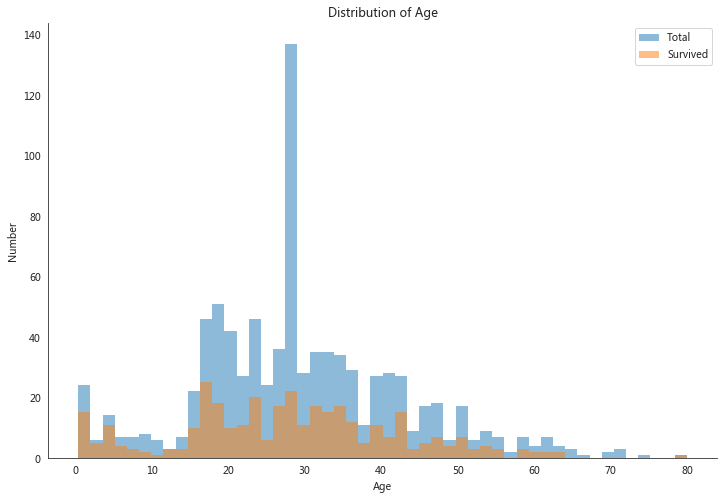

In [40]:
f,ax=plt.subplots(figsize=(12,8))
bins = 50
ax.hist(titanic_train.Age, bins, alpha=0.5, edgecolor='None',label='Total')
ax.hist(titanic_train.loc[titanic_train['Survived'] == 1,'Age'], bins, alpha=0.5, edgecolor='None',label='Survived')
ax.set(title='Distribution of Age',xlabel='Age',ylabel='Number')
plt.legend(loc='upper right')
plt.show()

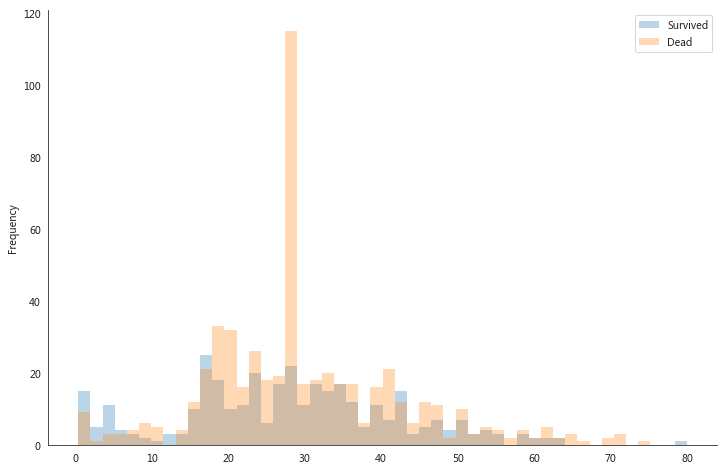

In [42]:
agehist=pd.concat([titanic_train.loc[titanic_train.Survived==1,'Age'],\
                   titanic_train.loc[titanic_train.Survived==0,'Age']],axis=1)
agehist.columns=['Survived','Dead']
agehist.plot(kind='hist',bins=50,figsize=(12,8),alpha=0.3,edgecolor='none');

In [43]:
def bar_show(keyname):
    fig,ax=plt.subplots()
    sns.barplot(x=keyname,y='Survived',data=titanic_train,color='steelblue')

/Users/mabelfan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


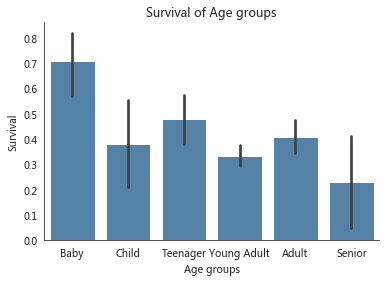

In [44]:
bar_show('age_cut')
plt.title('Survival of Age groups')
plt.xlabel('Age groups')
plt.ylabel('Survival')
plt.show();

相比于其他年龄段人员，5岁以下的婴幼儿的生还率最高,其次是青少年，长者的生还率最低。

### 问题二  
不同性别的生还率是多少？生还人员中性别比例状况？

In [45]:
titanic_train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

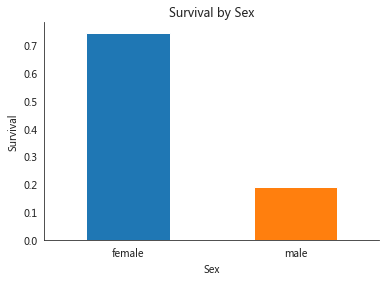

In [46]:
titanic_train.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival by Sex')
plt.xticks(rotation=0)
plt.ylabel('Survival');

基于测试数据集，女性生还率高达74%，远高于男性的19%。

In [47]:
#计算不同性别是否生还的比例
def get_survival(x1,x2):
    survived_sex = titanic_train.loc[(titanic_train.Survived==x1) & (titanic_train.Sex==x2),'Survived'].count()
    return survived_sex / titanic_train.Sex.count()

vals = np.array([[get_survival(1,'female'),get_survival(1,'male')],[get_survival(0,'female'),get_survival(0,'male')]])
vals

array([[0.26150393, 0.12233446],
       [0.09090909, 0.52525253]])

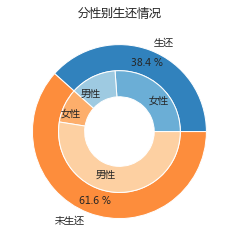

In [48]:
fig, ax = plt.subplots()

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([0, 5]))
inner_colors = cmap(np.array([1, 2, 6, 7]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels=['生还','未生还'],rotatelabels=0,
       autopct='% 3.1f %%', pctdistance=0.85, wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors, labels=['女性','男性','女性','男性'],labeldistance=0.7,\
      wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="分性别生还情况")

plt.show();

从如上饼图可看出，基于现有的数据集，整体生还率为38.4%，生还女性占总体的26.2%，高于男性, 未生还的男性占总体的53%。

### 问题三  
哪个舱位的人员生还率最高？

In [49]:
titanic_train.pivot_table('Survived',index='Pclass',margins=True)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363
All,0.383838


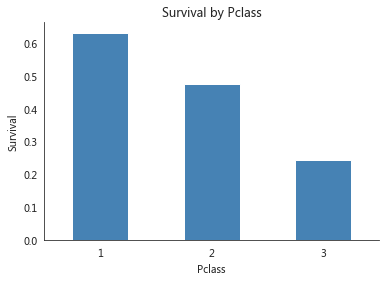

In [50]:
titanic_train.groupby('Pclass')['Survived'].mean().plot(kind='bar',color='steelblue')
plt.title('Survival by Pclass')
plt.xticks(rotation=0)
plt.ylabel('Survival');

如预期所料，**一等舱的生还最高**，为63%，生还率顺序为一等舱>二等舱>三等舱。

** Sex & Pclass **

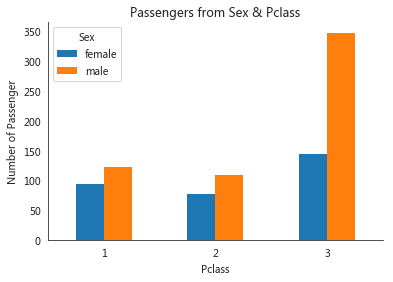

In [51]:
f,ax = plt.subplots()
f.set_size_inches((6,4))
titanic_train.groupby(['Pclass','Sex'])['PassengerId'].count().unstack().plot(kind='bar',ax = ax,edgecolor='none')
ax.set_title('Passengers from Sex & Pclass')
ax.set_ylabel('Number of Passenger')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show();

从整体来看，各类舱位均是男性乘客较多，特别是三等舱，男性乘客是女性的2倍多。  
因男性的生还率远低于女性，这对于不同舱位的生还率存在较大的影响。

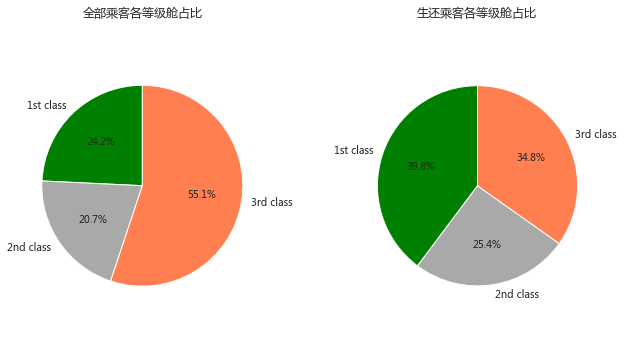

In [52]:
labels = '1st class','2nd class','3rd class'
titanic_survived = titanic_train.loc[titanic_train.Survived == 1,:]
datas = [titanic_train,titanic_survived]

fig, axes = plt.subplots(1,2,figsize=(10,6))
for i,data in zip(range(2),datas):
    axes[i].pie(data.groupby('Pclass')['Survived'].count()/data.Survived.count(),\
        labels=labels, autopct='%1.1f%%',colors=['Green','darkgray','coral'],\
        shadow=False, startangle=90,wedgeprops=dict(edgecolor='w'))
    axes[i].axis('equal')

axes[0].set_title('全部乘客各等级舱占比')
axes[1].set_title('生还乘客各等级舱占比')
plt.subplots_adjust(wspace = 0.5)

从生还人员所来自的舱位来看，一等舱人员占比最高，约为40%，而乘客数量占比超过半数的三等舱人员在生还人员中仅占约三分之一，二等舱人数占比最少，生还人员中占比稍有提高。

In [53]:
titanic_train.groupby(['Pclass','Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

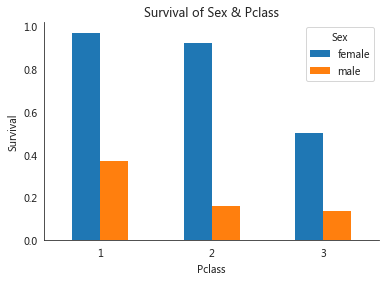

In [54]:
fig, ax = plt.subplots()
titanic_clean.groupby(['Pclass','Sex'])['Survived'].mean().unstack().plot(kind='bar',ax = ax,edgecolor='none')
ax.set_title('Survival of Sex & Pclass')
ax.set_ylabel('Survival')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

一等舱和二等舱的女性生还率均较高，超过90%，而三等舱的女性生还率却骤减，仅约50%；  
男性仅一等舱的生还率相对较高，但会低于三等舱女性的生还率，二等舱和三等舱的男性生还率取低，且相差不大。

/Users/mabelfan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


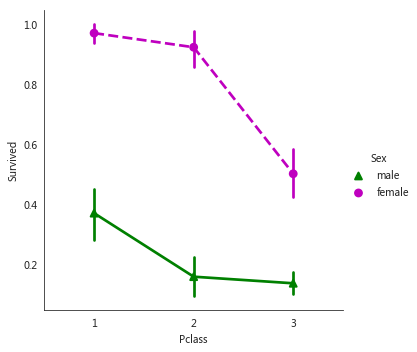

In [55]:
sns.catplot(x=("Pclass"), y=("Survived"), hue=("Sex"), kind="point",\
             palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],data=titanic_train);

/Users/mabelfan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


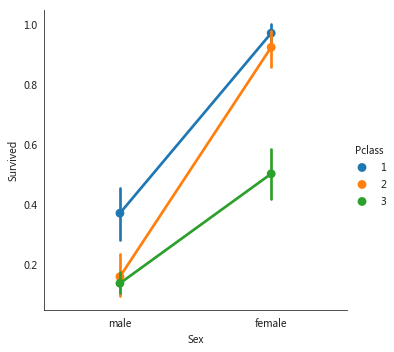

In [56]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=titanic_clean);

### 问题四  
其他因素对生还率的影响？  
前面已经探讨过年龄，性别，舱位等三种情况，下面对其他情况，包括Parch, SlibSp, Emabrked, Cabin等进行探索性分析。  
<br>
**Parch**

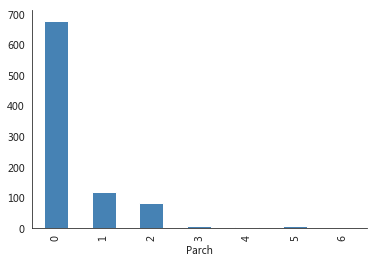

In [57]:
num_Parch = titanic_train.groupby('Parch')['PassengerId'].count()
num_Parch.plot(kind='bar',color='steelblue');

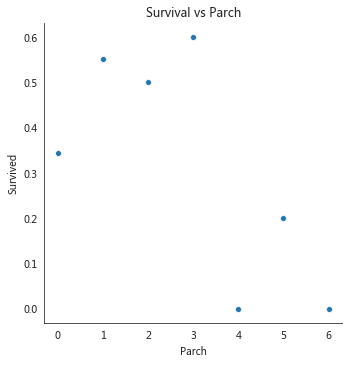

In [58]:
Survival_Parch = titanic_train.groupby('Parch')['Survived'].mean().reset_index()

ax = sns.relplot(x='Parch',y='Survived',data=Survival_Parch)
ax.set(title="Survival vs Parch")

绝大多数人没有双亲或小孩陪同出行，部分人有1－2个双亲或小孩陪同，而陪同超过2个人的情况非常少。  
虽然有3个陪同的生还率最高，但因为样本仅有5个人，且标准差较大，不足以作出有3个双亲或小孩陪同的人生还率就很高的推论；   
而有1－2个陪同的生还率较高，可能原因是小孩优先存活，同时需要有双亲陪同。

**SibSp**

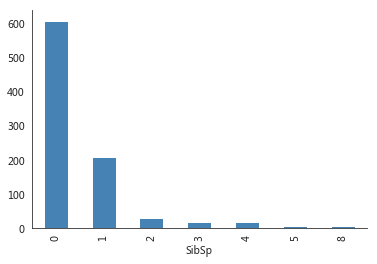

In [59]:
num_SibSp = titanic_train.groupby('SibSp')['PassengerId'].count()
num_SibSp.plot(kind='bar',color='steelblue');

与Parch情况类似，没有兄弟姐妹或配偶陪同出行的人员占绝大多数，其次是有1人陪同的情况，多位兄弟姐妹或配偶出行的情况较少。

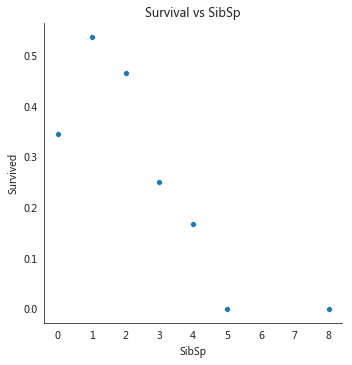

In [60]:
Survival_SibSp = titanic_train.groupby('SibSp')['Survived'].mean().reset_index()

ax = sns.relplot(x='SibSp',y='Survived',data=Survival_SibSp)
ax.set(title="Survival vs SibSp");

有1位兄弟姐妹或配偶陪同出行的生还率最高，其次是有2位陪同，但因2位陪同的情况样本数少，可靠性更低;  
没有兄弟姐妹或配偶陪同出行的生还率居第三，高于3位及以上陪同的情况。

**Embarked**

In [61]:
Survived_Embarked = pd.concat([titanic_train.groupby('Embarked')['Survived'].count(),\
                                  titanic_train.groupby('Embarked')['Survived'].sum(),\
                                  titanic_train.groupby('Embarked')['Survived'].mean()],axis=1).reset_index()
Survived_Embarked.columns=['Embarked','Total','Survived','Survival']
Survived_Embarked

,Embarked,Total,Survived,Survival
0,C,168,93.0,0.553571
1,Q,77,30.0,0.389610
2,S,646,219.0,0.339009


<Figure size 432x360 with 0 Axes>

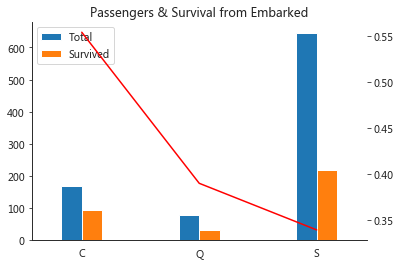

In [62]:
fig = plt.figure(figsize=(6,5))
ind = np.arange(3)
width = 0.35

Survived_Embarked[['Total','Survived']].plot(kind='bar',width=width)
Survived_Embarked['Survival'].plot(secondary_y=True,color='r')
plt.title('Passengers & Survival from Embarked')
plt.xticks(ind, ('C', 'Q', 'S'))

plt.show();

S港登船的人数最多，远超过S，Q登船的人数；  
而S港登船的生还率是最低的，C港登船的生还率最高。  

**Embarked & Pclass**

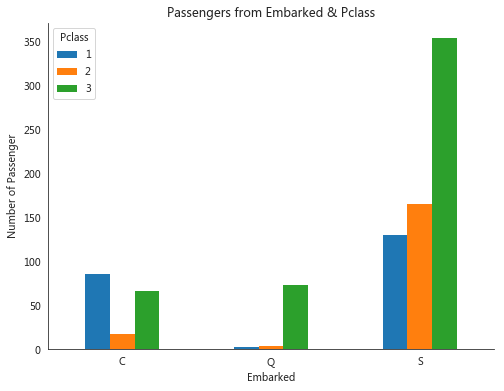

In [63]:
fig,ax = plt.subplots()
fig.set_size_inches((8,6))
titanic_train.groupby(['Embarked','Pclass'])['PassengerId'].count().unstack().plot(kind='bar',\
                                                                                     ax = ax,edgecolor='none')
ax.set(xlabel='Embarked',ylabel='Number of Passenger',title='Passengers from Embarked & Pclass')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

在Southampton港登船的人数最多，而其中又以三待舱人数占比最高，而三等舱的生还率较低，影响Southampton登船的生还率更低；  
在Cherbourg上船的一等舱人员占比最高，而一等舱的生还率最高，从而影响Cherbourg登船的生还率最高。


**Cabin**

/Users/mabelfan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


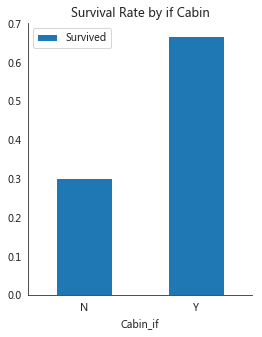

In [81]:
titanic_train['Cabin_if'] = titanic_train['Cabin_attr'].apply(lambda x:'N' if x=='U' else 'Y')

pd.pivot_table(titanic_train,index=['Cabin_if'],values=['Survived']).plot.bar(figsize=(4,5))
plt.title('Survival Rate by if Cabin')
plt.xticks([0,1],['N','Y'],rotation=0)
plt.show();

从上图可知，有包厢号的生还率会远高于无包厢的情况。

Text(0.5,1,'Survival Rate')

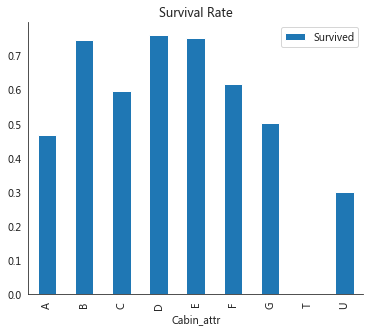

In [82]:
pd.pivot_table(titanic_train,index=['Cabin_attr'],values=['Survived']).plot.bar(figsize=(6,5))
plt.title('Survival Rate')

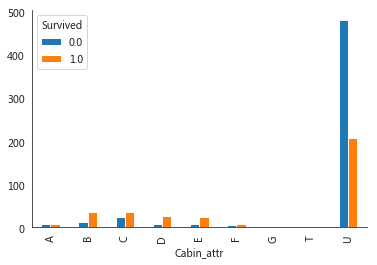

In [83]:
pd.crosstab(titanic_train.Cabin_attr,titanic_train.Survived).plot(kind='bar')

In [84]:
titanic_train.loc[titanic_train['Cabin'] != 'Unknown','Pclass'].unique()

array([1, 3, 2])

In [85]:
pd.crosstab(titanic_train.Pclass, titanic_train.Cabin_if,margins=True)

Cabin_if,N,Y,All
Pclass,,,
1,40,176,216
2,168,16,184
3,479,12,491
All,687,204,891


In [86]:
pd.crosstab(titanic_train.Pclass, titanic_train.Cabin_attr,margins=True)

Cabin_attr,A,B,C,D,E,F,G,T,U,All
Pclass,,,,,,,,,,
1,15,47,59,29,25,0,0,1,40,216
2,0,0,0,4,4,8,0,0,168,184
3,0,0,0,0,3,5,4,0,479,491
All,15,47,59,33,32,13,4,1,687,891


从上可知，一等舱只有小部分没有客舱号，而二等舱和三等舱只有少数有客舱号，另客舱号'C123'中的'C'说明的是甲板层，因此将以此作为一个特征。  
这里有两种方案可尝试，一是保留客舱号的首字母作为分类，即Cabin_attr，one_hot coding后容易造成过拟合;  
二是以是否有客舱号为分类，即Cabin_if，因为考虑到将空值的其他情况均占比较小。

In [87]:
titanic_train[titanic_train['Cabin_attr']=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tn_ts,Cabin_attr,title,age_cut,Cabin_if
339,340,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,1,T,Mr,Adult,Y


T甲板的生还率为0,细究后惊奇地发现，仅有一名成年男性，且未生还。  
一等舱的生还率最高，所以除T客舱外，其他均要高于客舱号为空的情况。

# 生还预测

In [90]:
titanic_clean['Cabin_if'] = titanic_clean['Cabin_attr'].apply(lambda x:'N' if x=='U' else 'Y')

In [91]:
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tn_ts,Cabin_attr,title,age_cut,Cabin_if
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,U,Mr,Young Adult,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs,Adult,Y
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,U,Miss,Young Adult,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs,Young Adult,Y
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,U,Mr,Young Adult,N


In [89]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tn_ts,Cabin_attr,title,age_cut,Cabin_if
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1,U,Mr,Young Adult,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs,Adult,Y
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,U,Miss,Young Adult,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs,Young Adult,Y
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,U,Mr,Young Adult,N


整体数据集的整理情况与测试集的一致，下面对分类变量以数字代替便于做相关性分析。

In [92]:
sex_dict = {'male':1,'female':2}
age_cut_dict = {'Baby':1,'Child':2,'Teenager':3,'Young Adult':4,'Adult':5,'Senior':5}
Cabin_dict = {'Y':1,'N':2}
embarked_dict = {'C':1,'Q':2,'S':3}
title_dict = {'selected_female':1,'Mrs':2, 'Miss':3, 'Master':4, 'selected_male':5, 'Mr':6}

titanic_rel = titanic_train.drop(['tn_ts'],axis=1).copy()
titanic_rel['sex_nm'] = titanic_rel['Sex'].map(lambda x: sex_dict[x])
titanic_rel['age_group_nm'] = titanic_rel['age_cut'].map(lambda x: age_cut_dict[x])
titanic_rel['cabin_if_nm'] = titanic_rel['Cabin_if'].map(lambda x: Cabin_dict[x])
titanic_rel['embarked_nm'] = titanic_rel['Embarked'].map(lambda x: embarked_dict[x])
titanic_rel['title_nm'] = titanic_rel['title'].map(lambda x: title_dict[x])

In [93]:
titanic_rel.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_attr', 'title',
       'age_cut', 'Cabin_if', 'sex_nm', 'age_group_nm', 'cabin_if_nm',
       'embarked_nm', 'title_nm'],
      dtype='object')

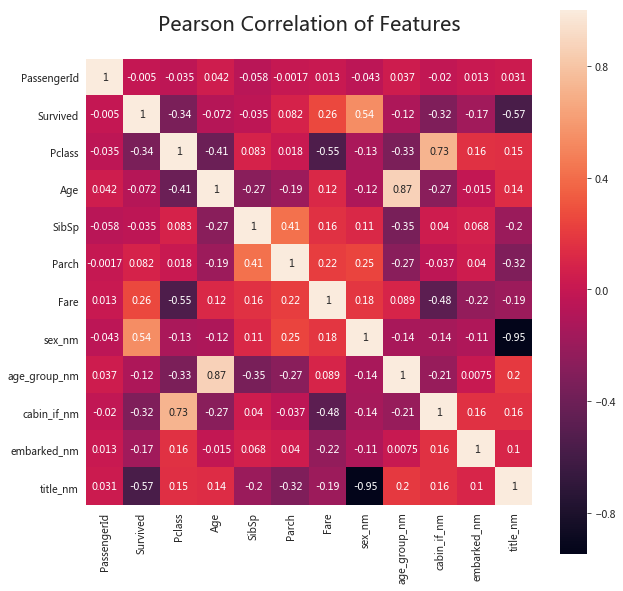

In [94]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(titanic_rel.corr(),annot=True,square=True)

## 特征工程  
1. Parch和SibSp均为亲属关系，相关系数为0.41,考虑合为一个特征，fsize = Parch + SibSp  
2. Cabin_if与Pclass的相关性较大，因Pclass在很大程度上决定是否有包厢号；      
3. 

In [96]:
titanic_rel.pivot_table('Fare',index='Pclass',columns='Cabin_attr',margins=True)

Cabin_attr,A,B,C,D,E,F,G,T,U,All
Pclass,,,,,,,,,,
1,39.623887,113.505764,100.151341,63.324286,55.740168,NaN,NaN,35.5,76.848643,84.154687
2,NaN,NaN,NaN,13.166675,11.587500,23.750000,NaN,NaN,20.909673,20.662183
3,NaN,NaN,NaN,NaN,11.000000,10.611660,13.58125,NaN,13.725077,13.675550
All,39.623887,113.505764,100.151341,57.244576,46.026694,18.696792,13.58125,35.5,19.157325,32.204208


<Figure size 432x288 with 0 Axes>

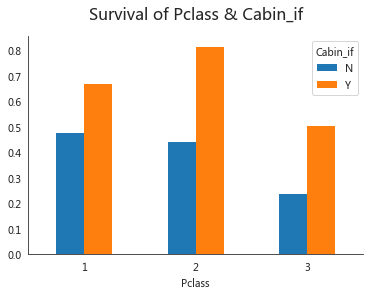

In [95]:
plt.figure()
titanic_rel.pivot_table('Survived',index='Pclass',columns='Cabin_if').plot(kind='bar',edgecolor='none')
plt.title('Survival of Pclass & Cabin_if',y=1.05, size=16)
plt.xticks(rotation=0)
plt.show();

对于无包厢号的，各等级舱的生还率与整体上名舱级的情况较为接近，而有包厢号的情况中，二等舱的生还率却是高于一等舱的。

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

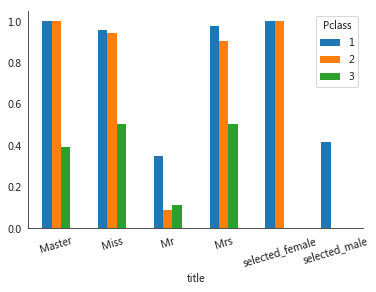

In [98]:
titanic_rel.pivot_table('Survived',index='title',columns='Pclass').plot(kind='bar',edgecolor='none')
plt.xticks(rotation=17)

对于女性和Master来说，一等舱和二等舱的生还率较为接近，均高于三等舱，而男性Mr和selected_male仅一等舱生还率稍高。

In [99]:
titanic_rel.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [100]:
titanic_rel['PC'] = titanic_rel['cabin_if_nm'].multiply(titanic_rel['Pclass'].values)

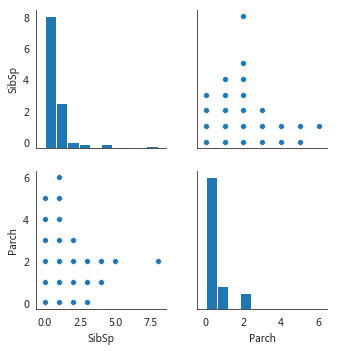

In [101]:
sns.pairplot(titanic_train[['SibSp','Parch']])

In [102]:
titanic_rel['fsize'] = titanic_rel['Parch'].add(titanic_rel['SibSp'].values)
titanic_rel[['fsize','Parch','SibSp']].sample(7)

,fsize,Parch,SibSp
890,0,0,0
187,0,0,0
585,2,2,0
700,1,0,1
818,0,0,0
40,1,0,1
356,1,1,0


In [103]:
titanic_rel['fp'] = titanic_rel['Fare']/(titanic_rel['fsize'].values+1)

In [104]:
titanic_rel['st'] = titanic_rel['title_nm'].multiply(titanic_rel['sex_nm'].values)

In [105]:
def map_class(x):
    if x == 1:
        return '1st'
    if x == 2:
        return '2nd'
    if x == 3:
        return '3rd'

titanic_rel['Lclass'] = titanic_rel['Pclass'].apply(map_class)

In [106]:
titanic_rel.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_nm,age_group_nm,cabin_if_nm,embarked_nm,title_nm,PC,fsize,fp,st
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.430221,0.523008,0.381594,32.204208,1.352413,3.947250,1.771044,2.536476,4.674523,4.343434,0.904602,19.916375,5.575758
std,257.353842,0.486592,0.836071,13.512132,1.102743,0.806057,49.693429,0.477990,0.982156,0.420397,0.791503,1.651561,2.019820,1.613459,35.841257,0.842439
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,1.000000,4.000000,2.000000,2.000000,3.000000,2.000000,0.000000,7.250000,6.000000
50%,446.000000,0.000000,3.000000,28.318910,0.000000,0.000000,14.454200,1.000000,4.000000,2.000000,3.000000,6.000000,6.000000,0.000000,8.300000,6.000000
75%,668.500000,1.000000,3.000000,36.750000,1.000000,0.000000,31.000000,2.000000,5.000000,2.000000,3.000000,6.000000,6.000000,1.000000,23.666667,6.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,5.000000,2.000000,3.000000,6.000000,6.000000,10.000000,512.329200,6.000000


In [107]:
titanic_rel.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_attr', 'title',
       'age_cut', 'Cabin_if', 'sex_nm', 'age_group_nm', 'cabin_if_nm',
       'embarked_nm', 'title_nm', 'PC', 'fsize', 'fp', 'st', 'Lclass'],
      dtype='object')

In [108]:
columns1 = ['PassengerId', 'Survived','PC','st','age_cut','fsize','fp','Lclass']
titanic_train1 = titanic_rel[columns1]
titanic_train1 = pd.get_dummies(titanic_train1)
titanic_train1.head()

,PassengerId,Survived,PC,st,fsize,fp,age_cut_Baby,age_cut_Child,age_cut_Teenager,age_cut_Young Adult,age_cut_Adult,age_cut_Senior,Lclass_1st,Lclass_2nd,Lclass_3rd
0,1,0.0,6,6,1,3.62500,0,0,0,1,0,0,0,0,1
1,2,1.0,1,4,1,35.64165,0,0,0,0,1,0,1,0,0
2,3,1.0,6,6,0,7.92500,0,0,0,1,0,0,0,0,1
3,4,1.0,1,4,1,26.55000,0,0,0,1,0,0,1,0,0
4,5,0.0,6,6,0,8.05000,0,0,0,1,0,0,0,0,1


In [119]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [129]:
titanic_train1.insert(2,'ones',1)
y = titanic_train1.iloc[:,1]
X = titanic_train1.iloc[:,2:]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(X.shape[1])

print(X.shape, theta.shape, y.shape)

(891, 14) (14,) (891,)


In [131]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

In [132]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [133]:
learningRate = 1
costReg(theta, X, y, learningRate)

617.5941378789117

In [134]:
gradientReg(theta, X, y, learningRate)

array([ 103.5       ,  449.54545455,  577.09090909,   93.62626263,
       2061.34482408,    5.11111111,    3.36868687,   11.96464646,
         54.47979798,   26.02020202,    2.55555556,   25.09090909,
         21.37373737,   57.03535354])

In [136]:
import scipy.optimize as opt
result2 = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y, learningRate))
result2

/Users/mabelfan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/mabelfan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


(array([-2.54817199e-01, -1.22866630e-04, -3.44015421e-05,  4.28865047e-05,
         8.00262064e-07, -9.36434604e-02, -9.35949761e-02, -9.34757920e-02,
        -9.34796171e-02, -9.33771874e-02, -9.33003383e-02, -1.24843678e-01,
        -1.24315387e-01, -1.24129446e-01]), 140, 3)

In [138]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [139]:
theta_min2 = np.matrix(result2[0])
predictions2 = predict(theta_min2, X)
correct2 = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions2, y)]
accuracy2 = (sum(map(int, correct2)) / len(correct2)) * 100
print ('Regularizationed accuracy = {:.1f}%'.format(accuracy2))

Regularizationed accuracy = 61.6%


In [140]:
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0, solver='newton-cg')
model.fit(X, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

\[LogisticReg](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [141]:
model.score(X, y)

0.7665544332210998

## 结论的限制性   
1. 据了解titanic船上人数总数为2224人，遇难人数逾1500人，而此数据集仅有891人，未生还人数为549人，此与真实数据不符导致所做的分析结果失真。　　　
2. 部分数据缺失，例如此数据集中年龄栏有177项空缺，填空的值与实际情况可能存在一定的差异。    
3. 除了现有提供的因素外，可能存在其他因素影响生还率。  